UNICAJA BANCO

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import sys
import pandas as pd
sys.path.append('/Users/luciamenendezfernandez/Desktop/TFM lucia/src/lag1_funciones')

In [7]:
# --- CONFIGURACIÓN INICIAL ---
import sys
import os

from preprocessing import cargar_datos
from features import crear_variables_lag_y_temporales
from model_training import dividir_train_test, definir_modelos, entrenar_y_evaluar_modelos
from visualization import graficar_predicciones

# --- PARÁMETROS ---
empresa = "UNICAJA BANCO"
ruta_datos = "/Users/luciamenendezfernandez/Desktop/TFM lucia/data/IBEX35_cotizaciones_20_Limpio.csv"

# --- 1. Cargar y preparar los datos ---
df_unicaja = cargar_datos(ruta_datos, empresa)

In [9]:
df_unicaja = df_unicaja.reset_index()
df_unicaja['Fecha'] = pd.to_datetime(df_unicaja['Fecha'], errors='coerce')

In [11]:
df_unicaja['Fecha'] = pd.to_datetime(df_unicaja['Fecha'], errors='coerce')

In [12]:
#Seleccionar solo las columnas necesarias y establecer el índice
df_unicaja = df_unicaja[['Fecha', 'Precio_cierre']].set_index('Fecha')

In [13]:
df_unicaja['Precio_cierre'] = pd.to_numeric(df_unicaja['Precio_cierre'], errors='coerce')

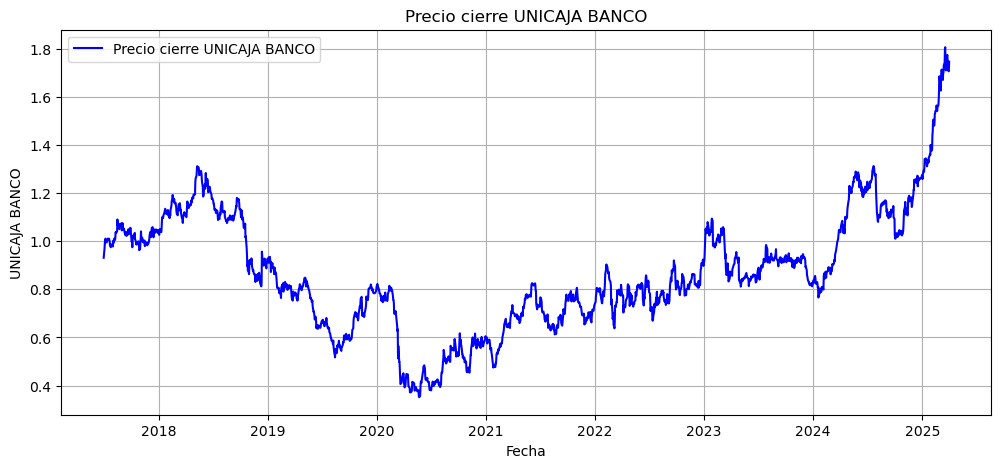

In [15]:
import matplotlib.pyplot as plt
# Graficar la serie temporal
plt.figure(figsize=(12, 5))
plt.plot(df_unicaja.index, df_unicaja['Precio_cierre'], label="Precio cierre UNICAJA BANCO", color='b')
plt.title("Precio cierre UNICAJA BANCO")
plt.xlabel("Fecha")
plt.ylabel("UNICAJA BANCO")
plt.legend()
plt.grid()
plt.show()

In [16]:
df_unicaja['year'] = df_unicaja.index.year                # Año
df_unicaja['month'] = df_unicaja.index.month              # Mes
df_unicaja['quarter'] = df_unicaja.index.quarter          # Trimestre
df_unicaja['day'] = df_unicaja.index.day                  # Día del mes
df_unicaja['day_of_week'] = df_unicaja.index.dayofweek    # Día de la semana (0 = Lunes, 6 = Domingo)
df_unicaja['week_of_year'] = df_unicaja.index.isocalendar().week  # Semana del año

In [17]:
df_unicaja['Precio_cierre_lag1'] = df_unicaja['Precio_cierre'].shift(1)
df_unicaja['year_lag1'] = df_unicaja['year'].shift(1)
df_unicaja['month_lag1'] = df_unicaja['month'].shift(1)
df_unicaja['quarter_lag1'] = df_unicaja['quarter'].shift(1)
df_unicaja['day_of_week_lag1'] = df_unicaja['day_of_week'].shift(1)
df_unicaja['week_of_year_lag1'] = df_unicaja['week_of_year'].shift(1)

In [18]:
# Media móvil con ventana de 60 días (2 meses)
df_unicaja['rolling_mean_60'] = df_unicaja['Precio_cierre'].shift(1).rolling(window=60).mean()
# Desviación estándar móvil con ventana de 60 días (2 meses)
df_unicaja['rolling_std_60'] = df_unicaja['Precio_cierre'].shift(1).rolling(window=60).std()

# Media móvil con ventana de 7 días (aproximadamente 1 semana)
df_unicaja['rolling_mean_7'] = df_unicaja['Precio_cierre'].shift(1).rolling(window=7).mean()
# Desviación estándar móvil con ventana de 7 días (aproximadamente 1 semana)
df_unicaja['rolling_std_7'] = df_unicaja['Precio_cierre'].shift(1).rolling(window=7).std()

# Media móvil con ventana de 30 días (aproximadamente 1 mes)
df_unicaja['rolling_mean_30'] = df_unicaja['Precio_cierre'].shift(1).rolling(window=30).mean()
# Desviación estándar móvil con ventana de 30 días (aproximadamente 1 mes)
df_unicaja['rolling_std_30'] = df_unicaja['Precio_cierre'].shift(1).rolling(window=30).std()


In [19]:
df_unicaja.isnull().sum()

Precio_cierre          0
year                   0
month                  0
quarter                0
day                    0
day_of_week            0
week_of_year           0
Precio_cierre_lag1     1
year_lag1              1
month_lag1             1
quarter_lag1           1
day_of_week_lag1       1
week_of_year_lag1      1
rolling_mean_60       60
rolling_std_60        60
rolling_mean_7         7
rolling_std_7          7
rolling_mean_30       30
rolling_std_30        30
dtype: int64

In [20]:
df_unicaja = df_unicaja.dropna()

In [21]:
df_unicaja

,Precio_cierre,year,month,quarter,day,day_of_week,week_of_year,Precio_cierre_lag1,year_lag1,month_lag1,quarter_lag1,day_of_week_lag1,week_of_year_lag1,rolling_mean_60,rolling_std_60,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30
Fecha,,,,,,,,,,,,,,,,,,,
2017-09-22,1.039945,2017,9,3,22,4,38,1.049493,2017.0,9.0,3.0,3.0,38,1.023660,0.032836,1.033011,0.008857,1.050289,0.018408
2017-09-25,1.031193,2017,9,3,25,0,39,1.039945,2017.0,9.0,3.0,4.0,38,1.025477,0.030555,1.033239,0.009035,1.050475,0.018270
2017-09-26,1.034376,2017,9,3,26,1,39,1.031193,2017.0,9.0,3.0,0.0,39,1.026485,0.029704,1.033807,0.008713,1.050156,0.018526
2017-09-27,1.055859,2017,9,3,27,2,39,1.034376,2017.0,9.0,3.0,1.0,39,1.027148,0.029422,1.035512,0.007144,1.048300,0.017126
2017-09-28,1.053472,2017,9,3,28,3,39,1.055859,2017.0,9.0,3.0,2.0,39,1.028169,0.029336,1.038809,0.010301,1.047955,0.016855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-26,1.774000,2025,3,1,26,2,13,1.770000,2025.0,3.0,1.0,1.0,13,1.508633,0.166669,1.755571,0.037318,1.655333,0.085553
2025-03-27,1.749000,2025,3,1,27,3,13,1.774000,2025.0,3.0,1.0,2.0,13,1.516967,0.167237,1.760143,0.037338,1.663500,0.084767
2025-03-28,1.710000,2025,3,1,28,4,13,1.749000,2025.0,3.0,1.0,3.0,13,1.525150,0.166361,1.752857,0.032987,1.670767,0.082326


In [22]:
 # Definir fecha de corte
fecha_test = '2023-04-01'

# División
train = df_unicaja[df_unicaja.index < fecha_test]
test = df_unicaja[df_unicaja.index >= fecha_test]

print(f"Train: {train.index.min().date()} → {train.index.max().date()}")
print(f"Test : {test.index.min().date()} → {test.index.max().date()}")

Train: 2017-09-22 → 2023-03-31
Test : 2023-04-03 → 2025-04-01


In [23]:
train

,Precio_cierre,year,month,quarter,day,day_of_week,week_of_year,Precio_cierre_lag1,year_lag1,month_lag1,quarter_lag1,day_of_week_lag1,week_of_year_lag1,rolling_mean_60,rolling_std_60,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30
Fecha,,,,,,,,,,,,,,,,,,,
2017-09-22,1.039945,2017,9,3,22,4,38,1.049493,2017.0,9.0,3.0,3.0,38,1.023660,0.032836,1.033011,0.008857,1.050289,0.018408
2017-09-25,1.031193,2017,9,3,25,0,39,1.039945,2017.0,9.0,3.0,4.0,38,1.025477,0.030555,1.033239,0.009035,1.050475,0.018270
2017-09-26,1.034376,2017,9,3,26,1,39,1.031193,2017.0,9.0,3.0,0.0,39,1.026485,0.029704,1.033807,0.008713,1.050156,0.018526
2017-09-27,1.055859,2017,9,3,27,2,39,1.034376,2017.0,9.0,3.0,1.0,39,1.027148,0.029422,1.035512,0.007144,1.048300,0.017126
2017-09-28,1.053472,2017,9,3,28,3,39,1.055859,2017.0,9.0,3.0,2.0,39,1.028169,0.029336,1.038809,0.010301,1.047955,0.016855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,0.841949,2023,3,1,27,0,13,0.832377,2023.0,3.0,1.0,4.0,12,0.999758,0.061737,0.870915,0.023403,0.979373,0.070973
2023-03-28,0.843690,2023,3,1,28,1,13,0.841949,2023.0,3.0,1.0,0.0,13,0.998475,0.064197,0.866253,0.025690,0.973789,0.074999
2023-03-29,0.859789,2023,3,1,29,2,13,0.843690,2023.0,3.0,1.0,1.0,13,0.996829,0.066868,0.864016,0.027038,0.968176,0.078265


In [24]:
# Separar features (X) y target (y) en train
X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']
# Separar features (X) y target (y) en test
X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR()
}

# Definir los hiperparámetros de cada modelo para GridSearchCV
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

In [26]:
# Función para hacer GridSearch y comparar RMSE
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    best_model = None
    best_rmse = float('inf')
    best_model_name = ""

    for model_name, model in models.items():
        print(f"Entrenando {model_name}...")

        # Configurar GridSearchCV para cada modelo
        grid_search = GridSearchCV(estimator=model,
                                   param_grid=param_grids[model_name],
                                   scoring='neg_root_mean_squared_error',
                                   cv=3, # 3-fold cross-validation
                                   verbose=1)

        # Entrenar el modelo
        grid_search.fit(X_train, y_train)

        # Obtener el mejor modelo y su puntuación
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_  # Negativo porque usamos 'neg_root_mean_squared_error'

        print(f"Mejor RMSE para {model_name}: {best_score}")

        # Evaluar en el conjunto de prueba
        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en el conjunto de prueba para {model_name}: {rmse}")

        # Comparar el mejor RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = best_estimator
            best_model_name = model_name

    return best_model_name, best_model, best_rmse

# Suponiendo que ya tienes X_train, X_test, y_train, y_test listos
best_model_name, best_model, best_rmse = evaluate_models(X_train, y_train, X_test, y_test, models, param_grids)

print(f"El mejor modelo es: {best_model_name} con un RMSE de {best_rmse}")

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE para Linear Regression: 0.018624791881186747
RMSE en el conjunto de prueba para Linear Regression: 0.018815108596934287
Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE para Decision Tree: 0.0767768124113128
RMSE en el conjunto de prueba para Decision Tree: 0.11995339526230311
Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE para Random Forest: 0.07419387999917662
RMSE en el conjunto de prueba para Random Forest: 0.11503634080508814
Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE para Gradient Boosting: 0.08004149860618583
RMSE en el conjunto de prueba para Gradient Boosting: 0.11975894938588742
Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE para XGBoost: 0.08299379902839978
RMSE en el